In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns

In [2]:
file_path_2020 = '2020_survey_data.csv'
df20 = pd.read_csv(file_path_2020)

# 0. Features 분류

### Features를 아래와 같이 분류합니다:

   - 1. 건강상태 관련 (B. 건강상태와 건강행태, C: 기능상태와 간병수발, I: 인지기능)
   - 2. 가족/사회관계 관련 (A: 가구일반, F: 가족 및 사회관계, G: 가족간 도움교환)
   - 3. 노후생활 관련 (D: 여가 및 사회활동, H: 생활과 노후생활)
   - 4. 경제상태 관련 (E. 경제활동, J. 경제상태)

# 1. 건강상태 관련 (B. 건강상태와 건강행태, C: 기능상태와 간병수발, I: 인지기능)


1. RES_AGE 대상자 연령
2. RES_SEX 대상자 성별
1. B1 평소의 건강상태 (1에서 5 점차 나빠짐. 9는 결측치) (9: 177개)
2. B2_3 의사진단 만성질환 총 수
3. B2_2L_{1-32} 만성질환 i 유무 (예: 1, 아니오: 2) 
    - B2_2L_1 의사진단 만성질환 유무_고혈압
    - B2_2L_2 의사진단 만성질환 유무_뇌졸중(중풍, 뇌경색)
    - ...
5. B3 현재 3개월 이상 복용하고 있는 의사처방약(종류수)
6. B4 지난 1개월 동안 의료기관 이용 여부 (1:있다, 2: 없다)
7. B4_1_etc 지난 1개월 동안 의료기관 이용시 횟수 (99 비해당 -> 0으로 바꿔야 함)
9. B5_1_etc_1 지난 1년 간 병원 입원시 횟수_요양병원 (99 비해당 -> 0으로 바꿔야 함): 확인 결과 1번 이상 없음. 
10. B5_1_etc_2 지난 1년 간 병원 입원시 일수_요양병원	(999 비해당 -> 0으로 바꿔야 함)
12. B5_2_etc_1 지난 1년 간 병원 입원시 횟수_그 외 병의원 (99 비해당 -> 0으로 바꿔야 함)
13. B5_2_etc_2 지난 1년 간 병원 입원시 일수_그 외 병의원 (999 비해당 -> 0으로 바꿔야 함)
14. B6_{1_15}: 우울증 척도 (1: 예, 2: 아니오, 9 비해당)
    - B6_1 우울증척도_현재생활 만족
    - B6_2 우울증척도_의욕저하
    - ...
    - *note: 1, 5, 11, 13번 문항: 긍정 질문 (예: 현재에 만족하십니까?) | 그외: 부정 질문*
15. B7 현재 흡연 여부 (예: 1, 아니오: 2)
16. B8 지난 1년 간 음주 빈도 (0:1년간 안 마심) -> 7: 매일, 비해당: 99 (확인 결과 비해당 없음)
17. B8_1a	음주 시 평균 음주량(잔) (99: 비해당 -> 0으로 바꿔야 함)
18. B9 평소 운동 여부 (1:예, 2: 아니요)
19. B9_1a	주당 운동 일수 (9: 비해당 -> 0으로 바꿔야 함)
20. B9_2a	운동 시간(분) (999: 비해당 -> 0으로 바꿔야 함)
21. B9_3a 주당 운동 일수 x 운동시간 (B9_1a x B9_2a)
21. B10_1 몸무게 (998: 모름/무응답) (998: 14개)
22. B10_3 키 (998: 모름/무응답) (998: 17개)
23. B10_BMI 몸무게/키
23. B11_{1-10}: 영양 관리 상태 (1: 그렇다 2: 아니다)
    - B11_1 영양관리_음식의 양, 종류 조절
    - B11_2	영양관리_하루 2끼 미만
    - ...
24. C1_1 보조기 사용 여부_시력 (1:예(사용), 2: 아니요(미사용))
25. C2_1 보조기 사용 여부_청력 (1:예(사용), 2: 아니요(미사용))
26. C3_1 보조기 사용 여부_씹기 (1:예(사용), 2: 아니요(미사용))
27. C1_2 일상생활의 불편함_시력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
28. C2_2 일상생활의 불편함_청력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
29. C3_2 일상생활의 불편함_씹기 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
30. C4 근력상태_의자나 침대에 앉았다가 일어나기 5회 반복	(1:수행함 2:시도했으나 수행못함 3:수행 시도조차 못 하는 상태, 9:지금 하고싶지 않음 (486개))
31. C5_{1-6}: 동작수행 어려움 (1:전혀 어렵지 않다, 2:약간 어렵다, 3:매우 어렵다, 4:전혀 할 수 없다 5: 모르겠다)
    - C5_1 동작수행 어려움_운동장 한 바퀴(400m)정도 뛰기
    - C5_2 동작수행 어려움_운동장 한 바퀴(400m)정도 걷기
    - C5_3 동작수행 어려움_쉬지않고 10계단 오르기
    - ...
32. C6_{1-7} 도움 필요 여부 (1:완전 자립, 2:부분 도움,3:완전 도움)
33. C7_1_{1-7} 도움 필요 여부 (1:완전 자립, 2:부분 도움,3:완전 도움)
34. C7_2_{8-10} 도움 필요 여부 (1:완전 자립, 2:적은 부분 도움,3:많은 부분 도움,4:완전 도움)
    - C6_1 ADL_옷입기(옷 꺼내기, 단추, 지퍼, 벨트)
    - C7_1_1 IADL_몸단장(빗질, 화장, 면도, 손톱ㆍ발톱 깎기)
    - C7_2_8 IADL_물건 구매 결정, 돈 지불, 거스름돈 받기
    - ...
36. C10_1_2	장애정도 (1:심한 장애인(1-3급), 2:심하지 않은 장애인(4-6급), 9: 비해당 (비장애인))
37. I1x1 인지기능_총점 (99: 비해당)

## 1-1. 데이터 클렌징: 결측치 처리 등

#### B1 평소의 건강상태 (1에서 5 점차 나빠짐. 9는 결측치) (9: 177개)
 - 결측치 제외 평균치로 대체합니다.

In [3]:
mean_value = df20.loc[df20['B1'] != 9, 'B1'].mean()
df20['B1'] = df20['B1'].replace(9, mean_value)

#### B2_2L_{1-32} 만성질환 i 유무 (예: 1, 아니오: 2)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [4]:
cols = [col for col in df20.columns if col.startswith('B2_2L_')]
for col in cols:
    df20[col] = df20[col].replace(2, 0)

#### B4 지난 1개월 동안 의료기관 이용 여부 (1:있다, 2: 없다)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [5]:
df20['B4'] = df20['B4'].replace(2, 0)

#### B4_1_etc 지난 1개월 동안 의료기관 이용시 횟수 (99 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [6]:
df20['B4_1_etc'] = df20['B4_1_etc'].replace(99, 0)

#### B5_1_etc_1 지난 1년 간 병원 입원시 횟수_요양병원 (99 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [7]:
df20['B5_1_etc_1'] = df20['B5_1_etc_1'].replace(99, 0)

#### B5_1_etc_2 지난 1년 간 병원 입원시 일수_요양병원	(999 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 999에서 0으로 바꿔줍니다.

In [8]:
df20['B5_1_etc_2'] = df20['B5_1_etc_2'].replace(999, 0)

#### B5_2_etc_1 지난 1년 간 병원 입원시 횟수_그 외 병의원 (99 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [9]:
df20['B5_2_etc_1'] = df20['B5_2_etc_1'].replace(99, 0)

#### B5_2_etc_2 지난 1년 간 병원 입원시 일수_그 외 병의원 (999 비해당 -> 0으로 바꿔야 함)

In [10]:
df20['B5_2_etc_2'] = df20['B5_2_etc_2'].replace(999, 0)

#### B6_{1_15}: 우울증 척도 (1: 예, 2: 아니오, 9 비해당)
 - 1. 제 1, 5, 11, 13번 문항: "예"의 값을 1에서 0으로, "아니오"의 값을 2에서 1로 바꿔줍니다.
 - 2. 나머지 문항: "아니오"의 값을 2에서 0으로 바꿔줍니다.
 - 3. 비해당의 값을 9에서 결측치 제외 평균으로 바꿔줍니다. <결측치 177개는 제거하지 않습니다>

In [11]:
# Columns where 'yes' is changed from 1 to 0 and 'no' is changed from 2 to 1
for col in ['B6_1', 'B6_5', 'B6_11', 'B6_13']:
    df20[col] = df20[col].replace({1:0, 2:1})

# For all 'B6_' columns, 'no' is changed from 2 to 0
for col in df20.columns:
    if col.startswith('B6_') and col not in ['B6_1', 'B6_5', 'B6_11', 'B6_13']:
        df20[col] = df20[col].replace(2, 0)

# For all 'B6_' columns, 'not applicable' is changed from 9 to mean excluding 9
for col in df20.columns:
    if col.startswith('B6_'):
        mean_value = df20.loc[df20[col] != 9, col].mean()
        df20[col] = df20[col].replace(9, mean_value)


#### B7 현재 흡연 여부 (예: 1, 아니오: 2)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [12]:
df20['B7'] = df20['B7'].replace(2, 0)

#### B8_1a 음주 시 평균 음주량(잔) (99: 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [13]:
df20['B8_1a'] = df20['B8_1a'].replace(99, 0)

#### B9 평소 운동 여부 (1:예, 2: 아니요)
 -  아니오의 값을 2에서 0으로 바꿔줍니다.
 

In [14]:
df20['B9'] = df20['B9'].replace(2, 0)

#### B9_1a 주당 운동 일수 (9: 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 9에서 0으로 바꿔줍니다.

In [15]:
df20['B9_1a'] = df20['B9_1a'].replace(9, 0)

#### B9_2a 운동 시간(분) (999: 비해당 -> 0으로 바꿔야 함)
 - 비해당의 값을 999에서 0으로 바꿔줍니다.

In [16]:
df20['B9_2a'] = df20['B9_2a'].replace(999, 0)

#### B10_1 몸무게 (998: 모름/무응답) (998: 14개)
 - 결측치를 998에서 평균치로 바꿔줍니다.

In [17]:
mean_value = df20.loc[df20['B10_1'] != 998, 'B10_1'].mean()
df20['B10_1'] = df20['B10_1'].replace(998, mean_value)

#### B10_3 키 (998: 모름/무응답) (998: 17개)
 - 결측치를 998에서 평균치로 바꿔줍니다.

In [18]:
mean_value = df20.loc[df20['B10_3'] != 998, 'B10_3'].mean()
df20['B10_3'] = df20['B10_3'].replace(998, mean_value)

#### B11_{1-10}: 영양 관리 상태 (1: 그렇다 2: 아니다)
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [19]:
cols = [col for col in df20.columns if col.startswith('B11_')]
for col in cols:
    df20[col] = df20[col].replace(2, 0)

#### C1_1 보조기 사용 여부_시력 (1:예(사용), 2: 아니요(미사용))
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

#### C2_1 보조기 사용 여부_청력 (1:예(사용), 2: 아니요(미사용))
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

#### C3_1 보조기 사용 여부_씹기 (1:예(사용), 2: 아니요(미사용))
   - 아니오의 값을 2에서 0으로 바꿔줍니다.

In [20]:
cols = ['C1_1', 'C2_1', 'C3_1']
for col in cols:
    df20[col] = df20[col].replace(2, 0)

#### C1_2 일상생활의 불편함_시력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
#### C2_2 일상생활의 불편함_청력 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))
#### C3_2 일상생활의 불편함_씹기 (1: 불편하지 않다, 2:불편한 편이다, 3:매우 불편하다, 9:비해당 (177개))

In [21]:
mean_value = df20.loc[df20['C1_2'] != 9, 'C1_2'].mean()
df20['C1_2'] = df20['C1_2'].replace(9, mean_value)
mean_value = df20.loc[df20['C2_2'] != 9, 'C2_2'].mean()
df20['C2_2'] = df20['C2_2'].replace(9, mean_value)
mean_value = df20.loc[df20['C3_2'] != 9, 'C3_2'].mean()
df20['C3_2'] = df20['C3_2'].replace(9, mean_value)

#### C4 근력상태_의자나 침대에 앉았다가 일어나기 5회 반복	(1:수행함 2:시도했으나 수행못함 3:수행 시도조차 못 하는 상태, 9:지금 하고싶지 않음 (486개))
 - 결측치의 값을 9에서 평균값으로 바꿔줍니다.

In [22]:
mean_value = df20.loc[df20['C4'] != 9, 'C4'].mean()
df20['C4'] = df20['C4'].replace(9, mean_value)

#### C5_{1-6} 동작수행 어려움 (1:전혀 어렵지 않다, 2:약간 어렵다, 3:매우 어렵다, 4:전혀 할 수 없다 5: 모르겠다)
  - 5 제외 점수를 하나씩 깎아줍니다.  
  - 결측치의 값을 5에서 평균값으로 바꿔줍니다.

In [23]:
cols = [col for col in df20.columns if col.startswith('C5_')]
for col in cols:
    df20[col] = df20[col].replace({1:0,2:1,3:2,4:3})
    mean_value = df20.loc[df20[col] != 5, col].mean()
    df20[col] = df20[col].replace(5, mean_value)

#### C6_{1-7} 도움 필요 여부 (1:완전 자립, 2:부분 도움,3:완전 도움)
#### C7_1_{1-7} 도움 필요 여부 (1:완전 자립, 2:부분 도움,3:완전 도움)
#### C7_2_{8-10} 도움 필요 여부 (1:완전 자립, 2:적은 부분 도움,3:많은 부분 도움,4:완전 도움)
 - 점수를 1씩 깎아줍니다. 

In [24]:
cols = [col for col in df20.columns if col.startswith('C6_')] + [col for col in df20.columns if col.startswith('C7_1_')]+ [col for col in df20.columns if col.startswith('C7_2_')]
for col in cols:
    df20[col] = df20[col].replace({1:0,2:1,3:2,4:3})

#### C10_1_2 장애정도 (1:심한 장애인(1-3급),  2:심하지 않은 장애인(4-6급), 9: 비해당) 
 - 비장애인의 값을 9에서 0으로 바꿔줍니다
 - 1~3급 장애인의 값을 1에서 2로 바꿔줍니다.
 - 4~6급 장애인의 값을 2에서 1로 바꿔줍니다. 

In [25]:
df20['C10_1_2'] = df20['C10_1_2'].replace({9:0, 1:2, 2:1})

#### I1x1 인지기능_총점 (99: 비해당)
 - 비해당의 값을 99에서 평균치로 바꿔줍니다.

In [26]:
mean_value = df20.loc[df20['I1x1'] != 99, 'I1x1'].mean()
df20['I1x1'] = df20['I1x1'].replace(99, mean_value)

## 1.2 데이터 클렌징: 합성수치 처리 (더하기, 나누기 등)

### 계산해야 할 수치는 아래와 같습니다:
- B2_3: B2_2L_{1-32}의 합 <만성질환 갯수> (이미 있음)
- B6_SUM: B6_{1_15} 의 합 <우울증 척도 총합>
- B9_3a: 주당 운동 일수 x 운동시간 (B9_1a x B9_2a) <주당운동시간(분)>
- B10_BMI: 몸무게/키 <BMI 수치>
- B11_SUM: B11_{1-10}의 합 <영양관리상태 총합> 
- C_SUM_1: C{1-3}_1의 합 <보조기 사용 여부 (시력, 청력, 씹기)총합>
- C_SUM_2: C{1-3}_2의 합 <일상생활 불편함 (시력, 청력, 씹기)총합>
- C5_SUM: C5_{1-6}의 합 <동작수행 어려움 총합>
- C_6_7_SUM: C6_{1-7}, C7_1_{1-7},C7_2_{8-10}의 총합 <일상생활 도움필요여부 총합>

In [27]:
df20['B6_SUM'] = df20[['B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B6_8', 'B6_9', 'B6_10', 'B6_11', 'B6_12', 'B6_13', 'B6_14', 'B6_15']].sum(axis=1)
df20['B9_3a'] = df20['B9_1a'] * df20['B9_2a']
df20['B10_BMI'] = df20['B10_1'] / df20['B10_3']
df20['B11_SUM'] = df20[['B11_1','B11_2','B11_3_1','B11_3_2','B11_3_3','B11_4','B11_5','B11_6','B11_7','B11_8','B11_9','B11_10']].sum(axis=1)
df20['C_SUM_1'] = df20[['C1_1','C2_1','C3_1']].sum(axis=1)
df20['C_SUM_2'] = df20[['C1_2','C2_2','C3_2']].sum(axis=1)
df20['C5_SUM'] = df20[['C5_1','C5_2','C5_3','C5_4','C5_5','C5_6']].sum(axis=1)
cols = [col for col in df20.columns if col.startswith('C6_')] + [col for col in df20.columns if col.startswith('C7_1_')]+ [col for col in df20.columns if col.startswith('C7_2_')]
df20['C_6_7_SUM'] = df20[cols].sum(axis = 1)

## 1.3. 건강상태관련 features 정리

건강상태관련 features는 아래와 같은 세종류의 features로 분류할 수 있습니다:
- health_essential: 필수적으로 포함해야 하는 features입니다.
- health_raw: health_essential에 포함되지 않는 합성 전 features입니다.
- health_compound: 합성 후 features 입니다.

추후 데이터 사용시, 두가지를 모두 사용해보고 그 중 accuracy가 높은 것을 고르면 될 것 같습니다:
- health_features_1: health_essential + health_raw
- health_features_2: health_essential + health_compound


In [28]:
# health essential: 15 columns
health_essential = ['RES_AGE','RES_SEX','B1','B3','B4','B4_1_etc','B5_1_etc_1','B5_1_etc_2','B5_2_etc_1','B5_2_etc_2','B7','B8','B8_1a','B9','C4','C10_1_2','I1x1']

# health_raw: 92 columns
health_raw = ['B2_2L_1','B2_2L_2','B2_2L_3','B2_2L_4','B2_2L_5','B2_2L_6','B2_2L_7','B2_2L_8','B2_2L_9','B2_2L_10','B2_2L_11','B2_2L_12','B2_2L_13','B2_2L_14','B2_2L_15','B2_2L_16','B2_2L_17','B2_2L_18','B2_2L_19','B2_2L_20','B2_2L_21','B2_2L_22','B2_2L_23','B2_2L_24','B2_2L_25','B2_2L_26','B2_2L_27','B2_2L_28','B2_2L_29','B2_2L_30','B2_2L_31','B2_2L_32',
              'B6_1','B6_2','B6_3','B6_4','B6_5','B6_6','B6_7','B6_8','B6_9','B6_10','B6_11','B6_12','B6_13','B6_14','B6_15',
              'B9_1a','B9_2a',
              'B10_1','B10_3',
              'B11_1','B11_2','B11_3_1','B11_3_2','B11_3_3','B11_4','B11_5','B11_6','B11_7','B11_8','B11_9','B11_10',
              'C1_1','C2_1','C3_1',
              'C1_2','C2_2','C3_2',
              'C5_1','C5_2','C5_3','C5_4','C5_5','C5_6',
              'C6_1','C6_2','C6_3','C6_4','C6_5','C6_6','C6_7',
              'C7_1_1','C7_1_2','C7_1_3','C7_1_4','C7_1_5','C7_1_6','C7_1_7',
              'C7_2_8','C7_2_9','C7_2_10',
             ]

# health_compound: 9 columns
health_compound = ['B2_3','B6_SUM','B9_3a','B10_BMI','B11_SUM','C_SUM_1','C_SUM_2','C5_SUM','C_6_7_SUM']

health_features_1 = health_essential + health_raw
health_features_2 = health_essential + health_compound

# 2. 가족/사회관계 관련 (A: 가구일반, F: 가족 및 사회관계, G: 가족간 도움교환)

1. EDM 동부/읍면부 (1:동부 2:읍면부)
1. AREA 지역 (광역시/도) 
    - <11:서울 21:부산 22:대구 23:인천 24:광주 25:대전 26:울산 29:세종 31:경기 32:강원 33:충북 34:충남 35:전북 36:전남 37:경북 38:경남 39:제주>
1. S5_1	총 가구원 수
1. S5_2	노인(만65세 이상) 가구원 수
1. S6_1	동거자녀 수_계
1. S6_2	동거자녀 수_남자
1. S6_3	동거자녀 수_여자
1. S6_4	동거자녀 수_미혼
1. S6_5	동거자녀 수_기혼
1. F1_1_2_1	비동거 생존자녀 수_남자 (999:비해당)
1. F1_1_2_2	비동거 생존자녀 수_여자 (999:비해당)
1. F1_1_3_1	비동거 생존자녀 수_미혼 (999:비해당)
1. F1_1_3_2	비동거 생존자녀 수_기혼 (999:비해당)
1. F2 비동거 생존자녀 전체_왕래 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 생존자녀 없음>)
1. F2_1 비동거 생존자녀 전체_연락 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 생존자녀 없음>)
1. F5_1_etc	비동거 손자녀 수 (99 비해당)
1. F5_1	비동거 손자녀 전체_왕래 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 손자녀 없음>)
1. F5_2	비동거 손자녀 전체_연락 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 손자녀 없음>)
1. G4_1	배우자_존재 여부 (1:있음 2:없음)
1. F6 배우자_건강상태 (1->5 건강악화, 9 비해당) 
1. F13_1_etc 살아있는 형제/자매 수 (99: 비해당)
1. F14 형제/자매를 포함한 친/인척과의 왕래 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
1. F14_1 형제/자매를 포함한 친/인척과의 연락 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
1. F15	친구/이웃/지인과의 왕래 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
1. F15_1 친구/이웃/지인과의 연락 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
1. F16_1 가깝게 지내는 형제/자매를 포함한 친/인척 수 (99:비해당)
1. F16_2 가깝게 지내는 친구/이웃/지인 수 (99:비해당)
1. G1_4_7 동거자녀_정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G1_4_8 동거자녀_정기적 현금지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)	
1. G1_4_9 동거자녀_비정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G1_4_10 동거자녀_비정기적 현금지원_도움 줌	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G1_4_11 동거자녀_현물지원_도움 받음	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G1_4_12 동거자녀_현물지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G2_4_7 비동거자녀_정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G2_4_8 비동거자녀_정기적 현금지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)	
1. G2_4_9 비동거자녀_비정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G2_4_10 비동거자녀_비정기적 현금지원_도움 줌	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G2_4_11 비동거자녀_현물지원_도움 받음	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G2_4_12 비동거자녀_현물지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G3_4_7 본인(배우자)부모_정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G3_4_8 본인(배우자)부모_정기적 현금지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)	
1. G3_4_9 본인(배우자)부모_비정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G3_4_10 본인(배우자)부모_비정기적 현금지원_도움 줌	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G3_4_11 본인(배우자)부모_현물지원_도움 받음	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
1. G3_4_12 본인(배우자)부모_현물지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)

## 2.1. 데이터 클렌징: 결측치 처리 등

#### EDM 동부/읍면부 (1:동부 2:읍면부)
 - 읍면부의 값을 2에서 0으로 바꿔줍니다.

In [29]:
df20['EDM'] = df20['EDM'].replace(2, 0)

#### AREA: 지역 (광역시/도)
 - one-hot-encoding으로 바꿔줍니다.

In [30]:
one_hot = pd.get_dummies(df20['AREA'], prefix='AREA')
df20 = df20.join(one_hot)

#### F1_1_2_1	비동거 생존자녀 수_남자 (999:비해당)
#### F1_1_2_2	비동거 생존자녀 수_여자 (999:비해당)
#### F1_1_3_1	비동거 생존자녀 수_미혼 (999:비해당)
#### F1_1_3_2	비동거 생존자녀 수_기혼 (999:비해당)
  - 비해당의 값을 999에서 0으로 바꿔줍니다.

In [31]:
df20['F1_1_2_1'] = df20['F1_1_2_1'].replace(999, 0)
df20['F1_1_2_2'] = df20['F1_1_2_2'].replace(999, 0)
df20['F1_1_3_1'] = df20['F1_1_3_1'].replace(999, 0)
df20['F1_1_3_2'] = df20['F1_1_3_2'].replace(999, 0)

#### F2 비동거 생존자녀 전체_왕래 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 생존자녀 없음>)
#### F2_1 비동거 생존자녀 전체_연락 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 생존자녀 없음>)
#### F5_1 비동거 손자녀 전체_왕래 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 손자녀 없음>)
#### F5_2 비동거 손자녀 전체_연락 빈도(지난 1년 간) (1->7 줄어듦. 9 비해당 <비동거 손자녀 없음>)
#### F14 형제/자매를 포함한 친/인척과의 왕래 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
#### F14_1 형제/자매를 포함한 친/인척과의 연락 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
#### F15	친구/이웃/지인과의 왕래 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
#### F15_1 친구/이웃/지인과의 연락 빈도(지난 1년 간) (1->7 줄어듦. 9:비해당)
 - 1->7, 2->6, 3->5 식으로 매핑해줍니다.
 - 비해당의 값을 9에서 0으로 바꿔줍니다.

In [32]:
df20['F2'] = df20['F2'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})
df20['F2_1'] = df20['F2_1'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})
df20['F5_1'] = df20['F5_1'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})
df20['F5_2'] = df20['F5_2'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})
df20['F14'] = df20['F14'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})
df20['F14_1'] = df20['F14_1'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})
df20['F15'] = df20['F15'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})
df20['F15_1'] = df20['F15_1'].replace({1:7,2:6,3:5,4:4,5:3,6:2,7:1,9:0})

#### G4_1 배우자_존재 여부 (1:있음 2:없음)
 - 없음의 값을 2에서 0으로 바꿔줍니다.

In [33]:
df20['G4_1'] = df20['G4_1'].replace(2,0)

#### F6 배우자_건강상태 (1->5 건강악화, 9 비해당) **<평균값 처리가 말이 되는지 모르겠네요..>**
 - 비해당의 값을 평균값처리 해줍니다. 

In [34]:
mean_value = df20.loc[df20['F6'] != 9, 'F6'].mean()
df20['F6'] = df20['F6'].replace(9, mean_value)

#### F13_1_etc 살아있는 형제/자매 수 (99: 비해당)
#### F16_1 가깝게 지내는 형제/자매를 포함한 친/인척 수 (99:비해당)
#### F16_2 가깝게 지내는 친구/이웃/지인 수 (99:비해당)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.

In [35]:
df20['F13_1_etc'] = df20['F13_1_etc'].replace(99,0)
df20['F16_1'] = df20['F16_1'].replace(99,0)
df20['F16_2'] = df20['F16_2'].replace(99,0)

#### G1_4_7 동거자녀_정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G1_4_8 동거자녀_정기적 현금지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)	
#### G1_4_9 동거자녀_비정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G1_4_10 동거자녀_비정기적 현금지원_도움 줌	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G1_4_11 동거자녀_현물지원_도움 받음	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G1_4_12 동거자녀_현물지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G2_4_7 비동거자녀_정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G2_4_8 비동거자녀_정기적 현금지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)	
#### G2_4_9 비동거자녀_비정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G2_4_10 비동거자녀_비정기적 현금지원_도움 줌	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G2_4_11 비동거자녀_현물지원_도움 받음	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G2_4_12 비동거자녀_현물지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G3_4_7 본인(배우자)부모_정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G3_4_8 본인(배우자)부모_정기적 현금지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)	
#### G3_4_9 본인(배우자)부모_비정기적 현금지원_도움 받음 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G3_4_10 본인(배우자)부모_비정기적 현금지원_도움 줌	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G3_4_11 본인(배우자)부모_현물지원_도움 받음	(1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
#### G3_4_12 본인(배우자)부모_현물지원_도움 줌 (1: 예, 2: 아니오, 9: 비해당) (비해당도 아니오로 바꿔야함)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.
 - 비해당의 값을 0에서 0으로 바꿔줍니다.

In [36]:
cols = ['G1_4_7','G1_4_8','G1_4_9','G1_4_10','G1_4_11','G1_4_12','G2_4_7','G2_4_8','G2_4_9','G2_4_10','G2_4_11','G2_4_12','G3_4_7','G3_4_8','G3_4_9','G3_4_10','G3_4_11','G3_4_12']
for col in cols:
    df20[col] = df20[col].replace({2:0, 9:0})

## 2.2. 데이터 클렌징: 합성수치 처리

### 계산해야 할 수치는 아래와 같습니다:
 - G1_4_AGG = G1_4_7 + G1_4_9 + G1_4_11 - G1_4_8 - G1_4_10 - G1_4_12 <동거자녀 지원받음 - 지원해줌>
 - G2_4_AGG = G2_4_7 + G2_4_9 + G2_4_11 - G2_4_8 - G2_4_10 - G2_4_12 <비동거자녀 지원받음 - 지원해줌>
 - G3_4_AGG = G3_4_7 + G3_4_9 + G3_4_11 - G3_4_8 - G3_4_10 - G3_4_12 <본인(배우자)부모 지원받음 - 지원해줌>

In [37]:
df20['G1_4_AGG'] = df20[['G1_4_7','G1_4_9','G1_4_11']].sum(axis=1) - df20[['G1_4_8','G1_4_10','G1_4_12']].sum(axis=1)
df20['G2_4_AGG'] = df20[['G2_4_7','G2_4_9','G2_4_11']].sum(axis=1) - df20[['G2_4_8','G2_4_10','G2_4_12']].sum(axis=1)
df20['G3_4_AGG'] = df20[['G3_4_7','G3_4_9','G3_4_11']].sum(axis=1) - df20[['G3_4_8','G3_4_10','G3_4_12']].sum(axis=1)

## 2.3 가족/사회관계 관련 features 정리

가족/사회관계 features는 아래와 같은 세종류의 features로 분류할 수 있습니다:
- social_essential: 필수적으로 포함해야 하는 features입니다.
- social_raw: social_essential에 포함되지 않는 합성 전 features입니다.
- social_compound: 합성 후 features 입니다.

추후 데이터 사용시, 두가지를 모두 사용해보고 그 중 accuracy가 높은 것을 고르면 될 것 같습니다:
- social_features_1: social_essential + social_raw
- social_features_2: social_essential + social_compound

In [38]:
social_essential = ['EDM','S5_1','S5_2','S6_1','S6_2','S6_3','S6_4','S6_5','F1_1_2_1','F1_1_2_2','F1_1_3_1','F1_1_3_2','F2','F2_1','F5_1_etc','F5_1','F5_2','G4_1','F6','F13_1_etc','F14','F14_1','F15','F15_1','F16_1','F16_2','AREA_11','AREA_21','AREA_22','AREA_23','AREA_24','AREA_25','AREA_26','AREA_29','AREA_31','AREA_32','AREA_33','AREA_34','AREA_35','AREA_36','AREA_37','AREA_38','AREA_39']
social_raw = ['G1_4_7','G1_4_8','G1_4_9','G1_4_10','G1_4_11','G1_4_12','G2_4_7','G2_4_8','G2_4_9','G2_4_10','G2_4_11','G2_4_12','G3_4_7','G3_4_8','G3_4_9','G3_4_10','G3_4_11','G3_4_12']
social_compound = ['G1_4_AGG','G2_4_AGG','G3_4_AGG']

social_features_1 = social_essential + social_raw
social_features_2 = social_essential + social_compound

# 3. 노후생활 관련 (D: 여가 및 사회활동, H: 생활과 노후생활)

1. D1_1_etc	하루 평균 TV시청 또는 라디오 청취 시간	(999 비해당)
1. D2 지난 1년 간 여행 여부 (1: 있다 2: 없다)
1. D3 지난 1년 간 여가·문화 활동(TV시청, 라디오 청취, 여행 제외)	(1:예 2:아니요)
1. D5_3_1 교육(학습활동)(TV 및 인터넷 강좌 등 온라인 학습활동 포함) 참여 빈도(회)_(월 기준) (999:비해당)
1. D5_3_2 교육(학습활동)(TV 및 인터넷 강좌 등 온라인 학습활동 포함) 참여 빈도(시간)_(회당 하루 기준) (999:비해당)
1. D5_3_3 월당 교육 참여 시간 (D5_3_1 x D5_3_1)
1. D6_1_1 동호회(클럽활동)_참여 빈도 (1->6 빈도 하락, 9: 비해당)
1. D6_1_2 친목단체_참여 빈도 (1->6 빈도 하락, 9: 비해당)
1. D6_1_3 정치사회단체_참여 빈도 (1->6 빈도 하락, 9: 비해당)
1. D7_3_1 자원봉사활동 빈도(회)_(월 기준) (999:비해당)
1. D7_3_2 자원봉사활동 빈도(시간)_(회당 하루 기준) (999:비해당)
1. D7_3_3 월당 자원봉사활동 (D7_3_1 x D7_3_1)
1. D8_1	종교활동 참여빈도 (1->6 줄어듦, 0: 없음 9: 비해당)
1. D11_2_1	경로당_이용 빈도(회)_(일주일 기준) (99:비해당)
1. D11_2_2	노인복지관_이용 빈도(회)_(일주일 기준)	(99:비해당)
1. D11_2_3	(종합)사회복지관, 장애인복지관, 여성회관 등_이용 빈도(회)_(일주일 기준)	(99:비해당)
1. D11_2_4	노인교실_이용 빈도(회)_(일주일 기준)(99:비해당)
1. D11_2_5	공공 여가문화시설(문화회관, 구민회관, 주민센터, 도서관 등)_이용 빈도(회)_(일주일 기준)(99:비해당)
1. D11_2_6	민간문화시설(백화점·마트, 대학 내 평생교육기관 등의 문화센터)_이용 빈도(회)_(일주일 기준)(99:비해당)
1. D11_2_SUM 복지시설 이용빈도 총점
1. D13_1 전자기기 활동여부_메시지 받기(문자, 카카오톡, 텔레그램 등)	(1:예 2:아니오 9:비해당)
1. D13_2 전자기기 활동여부_메시지 보내기(문자, 카카오톡, 텔레그램 등)
1. D13_3 전자기기 활동여부_정보 검색 및 조회(뉴스, 날씨 등)	
1. D13_4 전자기기 활동여부_사진 또는 동영상 촬영	
1. D13_5 전자기기 활동여부_음악 듣기(MP3, 라디오 등)
1. D13_6 전자기기 활동여부_게임
1. D13_7 전자기기 활동여부_동영상 보기(영화, TV프로그램, 유튜브 등)
1. D13_8 전자기기 활동여부_소셜네트워크 서비스(블로그, 커뮤니티, 밴드, 트위터, 페이스북, 인스타그램 등)
1. D13_10 전자기기 활동여부_금융거래(인터넷 뱅킹, 증권 등)
1. D13_11 전자기기 활동여부_애플리케이션 검색 및 설치
1. D14_1 생활 필요 정보 이용시 어려움_정부나 공공기관(건강보험공단 등)의 우편물 또는 공지 사항 등에 대해 용어 또는 내용을 이해하기 어려움 (1:있음 2:없음 9:비해당)
1. D14_2 생활 필요 정보 이용시 어려움_공공기관이나 마을(아파트), 마트 등에서 정보를 제공하는 공지사항의 글씨 크기가 작아서 보기 어려움(1:있음 2:없음 9:비해당)
1. D14_3 생활 필요 정보 이용시 어려움_각종 정보 제공이나 서비스 신청이 온라인/인터넷을 중심으로 이루어져서 이용하기 어려움(1:있음 2:없음 9:비해당)
1. H1 거주형태(가구)	(1:자가 2:전세, 3:보증금 있는 월세, 4:보증금 없는 월세(사글세), 5:무상)
    - H1_1 H1_2 H1_3 H1_4 H1_5
1. H2 현재 살고있는 주택에 대한 만족도 (1->5 만족도 떨어짐, 9: 비해당)
1. H3_1	시장, 슈퍼 등 일상용품 구매 장소까지 걸리는 시간 (1->5 멀어짐)
1. H3_2 병의원, 보건소 등 보건의료기관까지 걸리는 시간 (1->5 멀어짐)
1. H3_3	행정복지센터(읍ㆍ면ㆍ동사무소 또는 주민센터)까지 걸리는 시간 (1->5 멀어짐)
1. H3_4	노인(종합)복지관까지 걸리는 시간 (1->5 멀어짐)
1. H3_5	(종합)사회복지관, 장애인복지관, 여성회관 등까지 걸리는 시간 (1->5 멀어짐)
1. H3_6	버스 정류장·지하철역까지 걸리는 시간 (1->5 멀어짐)
1. H3_7	산책, 운동할 수 있는 공원까지 걸리는 시간 (1->5 멀어짐)
1. H3_SUM 접근성 총점
1. H4_1	지역사회 환경 만족도_생활에 필요한 편의시설, 사회복지시설, 의료기관 등의 거리 (1->5 만족도 떨어짐, 9:비해당)
1. H4_2	지역사회 환경 만족도_대중교통 빈도/노선  (1->5 만족도 떨어짐, 9:비해당)
1. H4_3	지역사회 환경 만족도_녹지공간, 공간 충분성 또는 거리	 (1->5 만족도 떨어짐, 9:비해당)
1. H4_4	지역사회 환경 만족도_치안, 교통안전  (1->5 만족도 떨어짐, 9:비해당)
1. H4_5	지역사회 환경 만족도_자녀 또는 친지의 거주지와의 거리 (1->5 만족도 떨어짐, 9:비해당)
1. H4_6	지역사회 환경 만족도_이웃과의 교류 기회 (1->5 만족도 떨어짐, 9:비해당)
1. H4_7	지역사회 환경 만족도_지역사회 환경 전반 (1->5 만족도 떨어짐, 9:비해당)
1. H4_SUM: 지역사회 만족도 총점
1. H_11: 현재 운전 여부 (1:현재 한다, 2:전에는 했으나 지금은 하지 않는다, 3:평생 한 적이 없다)
1. H12_1_etc 낙상_지난 1년 간 낙상 횟수 (99:비해당)
1. H13_1 지난 1년 간 범죄피해 여부_재산범죄 (1:예(있다) 2:아니요(없다))
1. H13_2 지난 1년 간 범죄피해 여부_폭력 및 강력범죄 (1:예(있다) 2:아니요(없다))
1. H13_3 지난 1년 간 범죄피해 여부_노인 대상 사기성 물건 구매 (1:예(있다) 2:아니요(없다))
1. H13_4 지난 1년 간 범죄피해 여부_사기전화(보이스 피싱) 피해 (1:예(있다) 2:아니요(없다))
1. H13_5 지난 1년 간 범죄피해 여부_보행자 교통사고 (1:예(있다) 2:아니요(없다))
1. H13_6 지난 1년 간 범죄피해 여부_안전사고(화재, 가스누출, 누수 등) (1:예(있다) 2:아니요(없다))
1. H13_SUM 지난 1년간 범죄피해 여부 총점
1. H14_1_1 타인으로부터 신체적 고통을 당함_여부 (1:예(있다) 2:아니요(없다))
1. H14_1_2 타인으로부터 성폭력 또는 성추행을 당함_여부 (1:예(있다) 2:아니요(없다))
1. H14_1_3 타인으로 인해 감정을 상함_여부 (1:예(있다) 2:아니요(없다))
1. H14_1_4 타인으로부터 금전적 피해를 입음_여부 (1:예(있다) 2:아니요(없다))
1. H14_1_5 가족이나 보호자가 돌봐주지 않음_여부 (1:예(있다) 2:아니요(없다))
1. H14_1_6 가족이나 보호자의 방임 및 생활비 미지원_여부 (1:예(있다) 2:아니요(없다))
1. H14_SUM 폭력과 방임 총점
1. H15 노인 연령 기준 (99:비해당)
1. H16_1 만족도_건강상태 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
1. H16_2 만족도_경제상태 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
1. H16_3 만족도_배우자와의 관계 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
1. H16_4 만족도_자녀와의 관계 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
1. H16_5 만족도_사회·여가·문화 활동 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
1. H16_6 만족도_친구 및 지역사회 관계 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
1. H16_7 만족도_삶 전반 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
1. H16_SUM 만족도총점
1. H18 노인의 사회적 존중 정도 (1:매우 그렇다 2:그렇다 3:그저 그렇다 4:그렇지 않다 5:전혀 그렇지 않다 9:비해당)
1. H25 만 60세 이후 자살 생각 (1:예(있다) 2:아니요(없다) 9:비해당)

## 2.1. 데이터 클렌징: 결측치 처리 등

#### D1_1_etc 하루 평균 TV시청 또는 라디오 청취 시간	(999 비해당)
 - 비해당의 값을 999에서 0으로 바꿔줍니다.
 
#### D2 지난 1년 간 여행 여부 (1: 있다 2: 없다)

#### D3 지난 1년 간 여가·문화 활동(TV시청, 라디오 청취, 여행 제외)	(1:예 2:아니요)
 - 아니오의 값을 2에서 0으로 바꿔줍니다. 
 
#### D5_3_1 교육(학습활동)(TV 및 인터넷 강좌 등 온라인 학습활동 포함) 참여 빈도(회)_(월 기준) (999:비해당)

#### D5_3_2 교육(학습활동)(TV 및 인터넷 강좌 등 온라인 학습활동 포함) 참여 빈도(시간)_(회당 하루 기준) (999:비해당)
 - 비해당의 값을 999에서 0으로 바꿔줍니다
 
#### D6_1_1 동호회(클럽활동)_참여 빈도 (1->6 빈도 하락, 9: 비해당)

#### D6_1_2 친목단체_참여 빈도 (1->6 빈도 하락, 9: 비해당)

#### D6_1_3 정치사회단체_참여 빈도 (1->6 빈도 하락, 9: 비해당)
 - 비해당의 값을 9에서 0으로 바꿔줍니다.
 - 1->6, 2->5... 이런식으로 바꿔줍니다.
 
#### D7_3_1 자원봉사활동 빈도(회)_(월 기준) (999:비해당)

#### D7_3_2 자원봉사활동 빈도(시간)_(회당 하루 기준) (999:비해당)
 - 비해당의 값을 999에서 0으로 바꿔줍니다
 
#### D8_1	종교활동 참여빈도 (1->6 줄어듦, 0: 없음 9: 비해당)
 - 비해당의 값을 9에서 0으로 바꿔줍니다.
 - 1->6, 2->5... 이런식으로 바꿔줍니다.
 
#### D11_2_1	경로당_이용 빈도(회)_(일주일 기준) (99:비해당)

#### D11_2_2	노인복지관_이용 빈도(회)_(일주일 기준)	(99:비해당)

#### D11_2_3	(종합)사회복지관, 장애인복지관, 여성회관 등_이용 빈도(회)_(일주일 기준)	(99:비해당)

#### D11_2_4	노인교실_이용 빈도(회)_(일주일 기준)(99:비해당)

#### D11_2_5	공공 여가문화시설(문화회관, 구민회관, 주민센터, 도서관 등)_이용 빈도(회)_(일주일 기준)(99:비해당)

#### D11_2_6	민간문화시설(백화점·마트, 대학 내 평생교육기관 등의 문화센터)_이용 빈도(회)_(일주일 기준)(99:비해당)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.
 
#### D13_1 전자기기 활동여부_메시지 받기(문자, 카카오톡, 텔레그램 등) (1:예 2:아니오 9:비해당)

#### D13_2 전자기기 활동여부_메시지 보내기(문자, 카카오톡, 텔레그램 등) 

#### D13_3 전자기기 활동여부_정보 검색 및 조회(뉴스, 날씨 등) 

#### D13_4 전자기기 활동여부_사진 또는 동영상 촬영	

#### D13_5 전자기기 활동여부_음악 듣기(MP3, 라디오 등) 

#### D13_6 전자기기 활동여부_게임

#### D13_7 전자기기 활동여부_동영상 보기(영화, TV프로그램, 유튜브 등)

#### D13_8 전자기기 활동여부_소셜네트워크 서비스(블로그, 커뮤니티, 밴드, 트위터, 페이스북, 인스타그램 등)

#### D13_10 전자기기 활동여부_금융거래(인터넷 뱅킹, 증권 등)

#### D13_11 전자기기 활동여부_애플리케이션 검색 및 설치

#### D14_1 생활 필요 정보 이용시 어려움_정부나 공공기관(건강보험공단 등)의 우편물 또는 공지 사항 등에 대해 용어 또는 내용을 이해하기 어려움 (1:있음 2:없음 9:비해당)

#### D14_2 생활 필요 정보 이용시 어려움_공공기관이나 마을(아파트), 마트 등에서 정보를 제공하는 공지사항의 글씨 크기가 작아서 보기 어려움(1:있음 2:없음 9:비해당)

#### D14_3 생활 필요 정보 이용시 어려움_각종 정보 제공이나 서비스 신청이 온라인/인터넷을 중심으로 이루어져서 이용하기 어려움(1:있음 2:없음 9:비해당)
 - 비해당의 값을 평균치로 바꿔줍니다.

#### H1 거주형태(가구) (1:자가 2:전세, 3:보증금 있는 월세, 4:보증금 없는 월세(사글세), 5:무상)
 - one-hot encoding을 해줍니다. ('무상'이란 선택지 탓에 상하관계가 뚜렷하지 못합니다. 고로 카테고리 취급합니다)
 
#### H4_1	지역사회 환경 만족도_생활에 필요한 편의시설, 사회복지시설, 의료기관 등의 거리 (1->5 만족도 떨어짐, 9:비해당)

#### H4_2	지역사회 환경 만족도_대중교통 빈도/노선  (1->5 만족도 떨어짐, 9:비해당)

#### H4_3	지역사회 환경 만족도_녹지공간, 공간 충분성 또는 거리	 (1->5 만족도 떨어짐, 9:비해당)

#### H4_4	지역사회 환경 만족도_치안, 교통안전  (1->5 만족도 떨어짐, 9:비해당)

#### H4_5	지역사회 환경 만족도_자녀 또는 친지의 거주지와의 거리 (1->5 만족도 떨어짐, 9:비해당)

#### H4_6	지역사회 환경 만족도_이웃과의 교류 기회 (1->5 만족도 떨어짐, 9:비해당)

#### H4_7	지역사회 환경 만족도_지역사회 환경 전반 (1->5 만족도 떨어짐, 9:비해당)
 - 비해당의 값을 9에서 평균치로 바꿔줍니다.
 
#### H_11: 현재 운전 여부 (1:현재 한다, 2:전에는 했으나 지금은 하지 않는다, 3:평생 한 적이 없다)
 - '현재 안한다'의 값을 2와 3에서 0으로 바꿔줍니다.

#### H12_1_etc 낙상_지난 1년 간 낙상 횟수 (99:비해당)
 - 비해당의 값을 99에서 0으로 바꿔줍니다.
 
#### H13_1 지난 1년 간 범죄피해 여부_재산범죄 (1:예(있다) 2:아니요(없다) 9:비해당)

#### H13_2 지난 1년 간 범죄피해 여부_폭력 및 강력범죄 

#### H13_3 지난 1년 간 범죄피해 여부_노인 대상 사기성 물건 구매 

#### H13_4 지난 1년 간 범죄피해 여부_사기전화(보이스 피싱) 피해 

#### H13_5 지난 1년 간 범죄피해 여부_보행자 교통사고 

#### H13_6 지난 1년 간 범죄피해 여부_안전사고(화재, 가스누출, 누수 등) 

#### H14_1_1 타인으로부터 신체적 고통을 당함_여부

#### H14_1_2 타인으로부터 성폭력 또는 성추행을 당함_여부

#### H14_1_3 타인으로 인해 감정을 상함_여부

#### H14_1_4 타인으로부터 금전적 피해를 입음_여부 

#### H14_1_5 가족이나 보호자가 돌봐주지 않음_여부

#### H14_1_6 가족이나 보호자의 방임 및 생활비 미지원_여부
 - 아니오의 값을 2에서 0으로 바꿔줍니다.
 - 비해당의 값을 9에서 0으로 바꿔줍니다.
 
#### H15 노인 연령 기준 (99:비해당)
 - 비해당의 값을 H99에서 평균치로 바꿔줍니다.
 
#### H16_1 만족도_건강상태 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)

#### H16_2 만족도_경제상태 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)

#### H16_3 만족도_배우자와의 관계 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)

#### H16_4 만족도_자녀와의 관계 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)

#### H16_5 만족도_사회·여가·문화 활동 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)

#### H16_6 만족도_친구 및 지역사회 관계 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)

#### H16_7 만족도_삶 전반 (1:매우 만족함 2:만족함 3:그저 그렇다 4:만족하지 않음 5:전혀 만족하지 않음 9:비해당)
 
#### H18 노인의 사회적 존중 정도 (1:매우 그렇다 2:그렇다 3:그저 그렇다 4:그렇지 않다 5:전혀 그렇지 않다 9:비해당)
 - 비해당의 값을 평균치로 바꿔줍니다.
 
#### H25 만 60세 이후 자살 생각 (1:예(있다) 2:아니요(없다) 9:비해당)
 - 아니오의 값을 2에서 0으로 바꿔줍니다.
 - 비해당의 값을 9에서 0으로 바꿔줍니다.

In [42]:
df20['D1_1_etc'] = df20['D1_1_etc'].replace(999, 0)
df20['D2'] = df20['D2'].replace(2, 0)
df20['D3'] = df20['D3'].replace(2, 0)
df20['D5_3_1'] = df20['D5_3_1'].replace(999, 0)
df20['D5_3_2'] = df20['D5_3_2'].replace(999, 0)
df20['D6_1_1'] = df20['D6_1_1'].replace({9:0,1:6,2:5,3:4,4:3,5:2,6:1})
df20['D6_1_2'] = df20['D6_1_2'].replace({9:0,1:6,2:5,3:4,4:3,5:2,6:1})
df20['D6_1_3'] = df20['D6_1_3'].replace({9:0,1:6,2:5,3:4,4:3,5:2,6:1})
df20['D7_3_1'] = df20['D7_3_1'].replace(999, 0)
df20['D7_3_2'] = df20['D7_3_2'].replace(999, 0)
df20['D8_1'] = df20['D8_1'].replace({9:0,1:6,2:5,3:4,4:3,5:2,6:1})
df20['D11_2_1'] = df20['D11_2_1'].replace(99, 0)
df20['D11_2_2'] = df20['D11_2_2'].replace(99, 0)
df20['D11_2_3'] = df20['D11_2_3'].replace(99, 0)
df20['D11_2_4'] = df20['D11_2_4'].replace(99, 0)
df20['D11_2_5'] = df20['D11_2_5'].replace(99, 0)
df20['D11_2_6'] = df20['D11_2_6'].replace(99, 0)
cols = ['D13_1','D13_2','D13_3','D13_4','D13_5','D13_6','D13_7','D13_8','D13_9','D13_10','D13_11','D14_1','D14_2','D14_3']
for col in cols:
    mean_value = df20.loc[df20[col] != 9, col].mean()
    df20[col] = df20[col].replace(9, mean_value)
one_hot = pd.get_dummies(df20['H1'], prefix='H1')
df20 = df20.join(one_hot)
cols = ['H4_1', 'H4_2','H4_3','H4_4','H4_5','H4_6','H4_7']
for col in cols:
    mean_value = df20.loc[df20[col] != 9, col].mean()
    df20[col] = df20[col].replace(9, mean_value)
df20['H11'] = df20['H11'].replace({2:0,3:0})
df20['H12_1_etc'] = df20['H12_1_etc'].replace({99:0})
cols = ['H13_1','H13_2','H13_3','H13_4','H13_5','H13_5','H13_6','H14_1_1','H14_1_2','H14_1_3','H14_1_4','H14_1_5','H14_1_6']
for col in cols:
    df20[col] = df20[col].replace({2:0,9:0})
mean_value = df20.loc[df20['H15'] != 99, 'H15'].mean()
df20['H15'] = df20['H15'].replace(99, mean_value)
cols = ['H16_1','H16_2','H16_3','H16_4','H16_5','H16_6','H16_7','H18']
for col in cols:
    mean_value = df20.loc[df20[col] != 9, col].mean()
    df20[col] = df20[col].replace(9, mean_value)
df20['H25'] = df20['H25'].replace({2:0,9:0})

## 2.2.  데이터 클렌징: 합성수치 처리

In [40]:
df20['H13_1'].describe()

count    10097.000000
mean         2.118649
std          0.921431
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: H13_1, dtype: float64

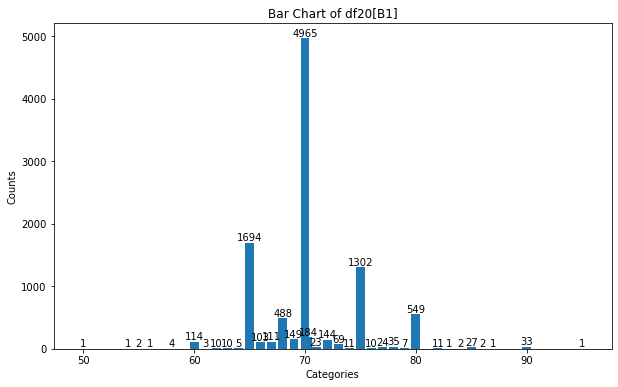

In [41]:
# df20['F1_1_1'] = df20['F1_1_2_2'].replace(999, 10)
values = df20['H15'].value_counts()
labels = values.index

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values)

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.title('Bar Chart of df20[B1]')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()